In [3]:
import numpy as np
import nltk
import wikipedia
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
topic = "Artificial Intelligence"
text = wikipedia.page(topic).content

In [7]:
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha()]

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
vocab = sorted(list(set(tokens)))
vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)

Vocabulary size: 3061


In [9]:
word_to_id = {w: i for i, w in enumerate(vocab)}
id_to_word = {i: w for w, i in word_to_id.items()}

In [10]:
window_size = int(input("Enter window size: "))

pairs = []
for i, word in enumerate(tokens):
    target_id = word_to_id[word]
    start = max(0, i - window_size)
    end = min(len(tokens), i + window_size + 1)
    for j in range(start, end):
        if i != j:
            context_id = word_to_id[tokens[j]]
            pairs.append((target_id, context_id))

pairs = np.array(pairs)

Enter window size: 2


In [11]:
def one_hot(idx):
    vec = np.zeros(vocab_size)
    vec[idx] = 1
    return vec

In [21]:
embedding_size = 2
learning_rate = 0.01
iterations = 1000
W1 = np.random.rand(vocab_size, embedding_size)
W2 = np.random.rand(embedding_size, vocab_size)

In [22]:
for it in range(iterations):
    loss = 0
    for target, context in pairs:
        x = one_hot(target)
        y_true = one_hot(context)

        # Forward pass
        h = np.dot(x, W1)
        y_pred = np.dot(h, W2)

        # Softmax
        y_pred = np.exp(y_pred)
        y_pred = y_pred / np.sum(y_pred)

        # Loss (cross-entropy)
        loss += -np.log(y_pred[context] + 1e-7)

        # Backpropagation
        e = y_pred - y_true
        dW2 = np.outer(h, e)
        dW1 = np.outer(x, np.dot(W2, e))

        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2

    if it % 200 == 0:
        print(f"Iter {it} Loss: {loss/len(pairs)}")
embeddings = W1

Iter 0 Loss: 7.326968491838916


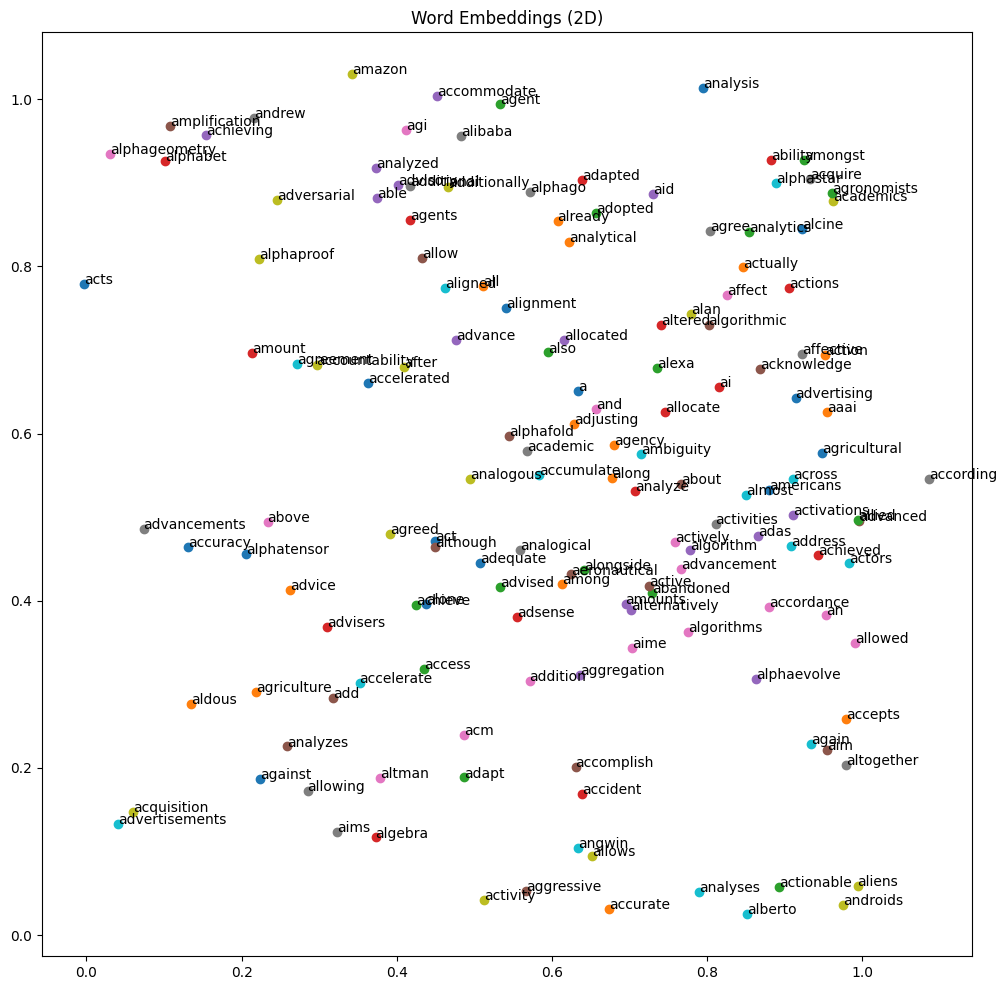

In [23]:
plt.figure(figsize=(12, 12))

for i in range(min(150, vocab_size)):   # plot only first 150 words
    w = id_to_word[i]
    x, y = embeddings[i]
    plt.scatter(x, y)
    plt.annotate(w, (x, y))

plt.title("Word Embeddings (2D)")
plt.show()

In [24]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-7)

def most_similar(word, top_n=10):
    if word not in word_to_id:
        return "Word not in vocabulary."

    word_vec = embeddings[word_to_id[word]]

    sims = []
    for i in range(vocab_size):
        if id_to_word[i] == word:
            continue
        sim = cosine_similarity(word_vec, embeddings[i])
        sims.append((id_to_word[i], sim))

    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    return sims[:top_n]

In [25]:
target_word = "intelligence"
print("\nTop 10 similar words to:", target_word)
print(most_similar(target_word))


Top 10 similar words to: intelligence
[('code', np.float64(0.9999999006198524)), ('scenarios', np.float64(0.99999985436471)), ('explanation', np.float64(0.9999998081810413)), ('complexity', np.float64(0.9999995876557662)), ('learning', np.float64(0.9999994084622056)), ('aldous', np.float64(0.9999979091386354)), ('granting', np.float64(0.9999974047692572)), ('open', np.float64(0.9999971327855103)), ('agents', np.float64(0.9999957355354744)), ('superintelligence', np.float64(0.999995632003464))]
